In [1]:
# import header files
import torch
import torch.nn as nn
import torchvision
import numpy as np

In [2]:


import os
import numpy as np
from torchvision import datasets, transforms
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset

# Define transforms (can also reuse from Cell 10 later)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the ENTIRE dataset (all 4 class folders together)
dataset_path = r"E:\resnet50+cbam\Dataset"
full_dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Extract labels for StratifiedKFold (CPU numpy array, safe for sklearn)
targets = np.array(full_dataset.targets)

# Define KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


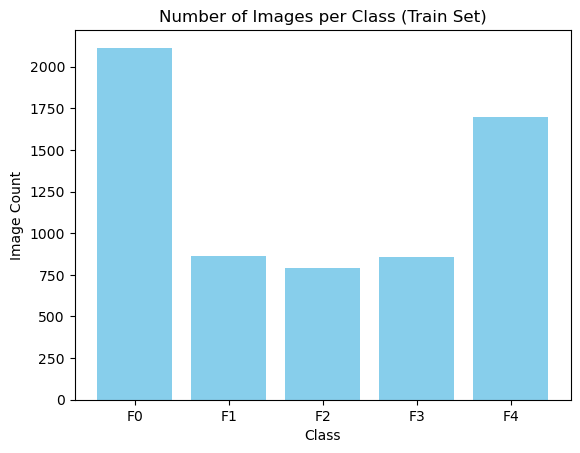

In [3]:
import os
import matplotlib.pyplot as plt

balanced_path = r"E:\resnet50+cbam\Dataset"

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(balanced_path, cls))) 
                for cls in os.listdir(balanced_path)}

plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.title("Number of Images per Class (Train Set)")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()


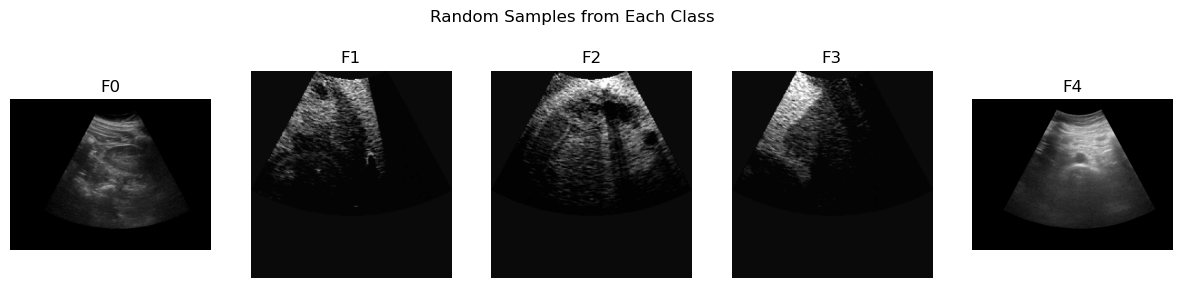

In [4]:
import cv2
import random

rows, cols = 2, 5  # show 2 rows, 5 classes
plt.figure(figsize=(15, 6))

for i, cls in enumerate(os.listdir(balanced_path)):
    class_dir = os.path.join(balanced_path, cls)
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Random Samples from Each Class")
plt.show()


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


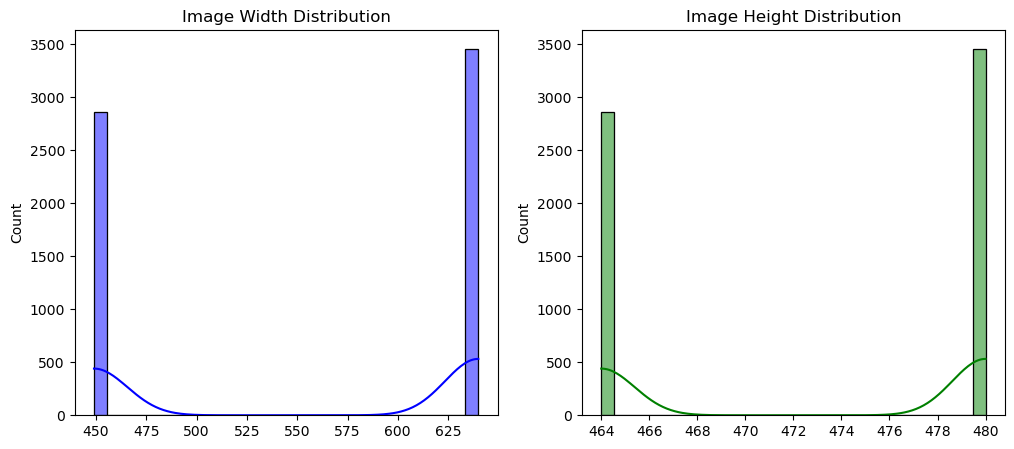

In [5]:
import seaborn as sns

widths, heights = [], []

for cls in os.listdir(balanced_path):
    class_dir = os.path.join(balanced_path, cls)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w, _ = img.shape
            widths.append(w)
            heights.append(h)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True, color="blue")
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True, color="green")
plt.title("Image Height Distribution")
plt.show()


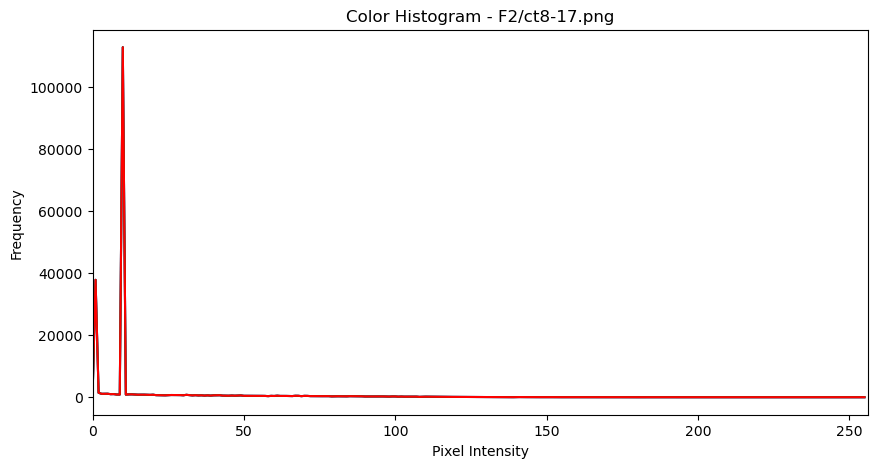

In [6]:
import numpy as np

# Pick random image
cls = random.choice(os.listdir(balanced_path))
img_name = random.choice(os.listdir(os.path.join(balanced_path, cls)))
img_path = os.path.join(balanced_path, cls, img_name)

img = cv2.imread(img_path)
colors = ("b", "g", "r")

plt.figure(figsize=(10,5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title(f"Color Histogram - {cls}/{img_name}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


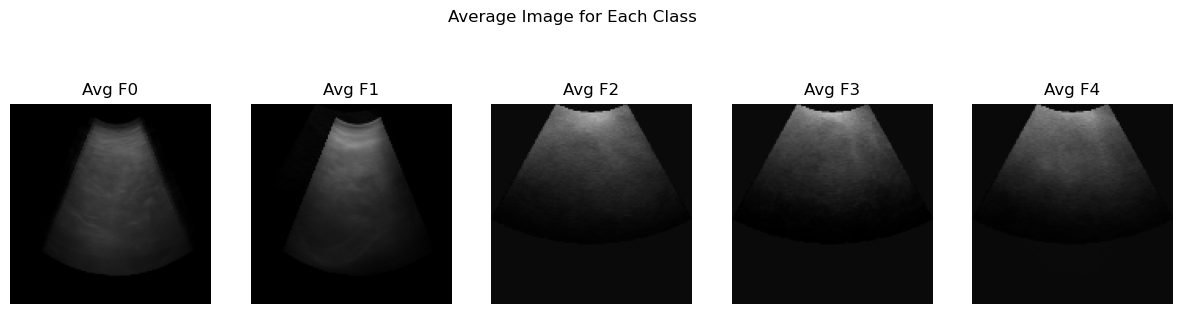

In [7]:
import numpy as np

rows, cols = 1, len(os.listdir(balanced_path))
plt.figure(figsize=(15, 4))

for i, cls in enumerate(os.listdir(balanced_path)):
    class_dir = os.path.join(balanced_path, cls)
    imgs = []
    
    for img_name in os.listdir(class_dir)[:50]:  # limit to first 50 for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # resize for comparison
        imgs.append(img.astype(np.float32))
    
    mean_img = np.mean(imgs, axis=0).astype(np.uint8)
    mean_img = cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i+1)
    plt.imshow(mean_img)
    plt.title(f"Avg {cls}")
    plt.axis("off")

plt.suptitle("Average Image for Each Class")
plt.show()


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

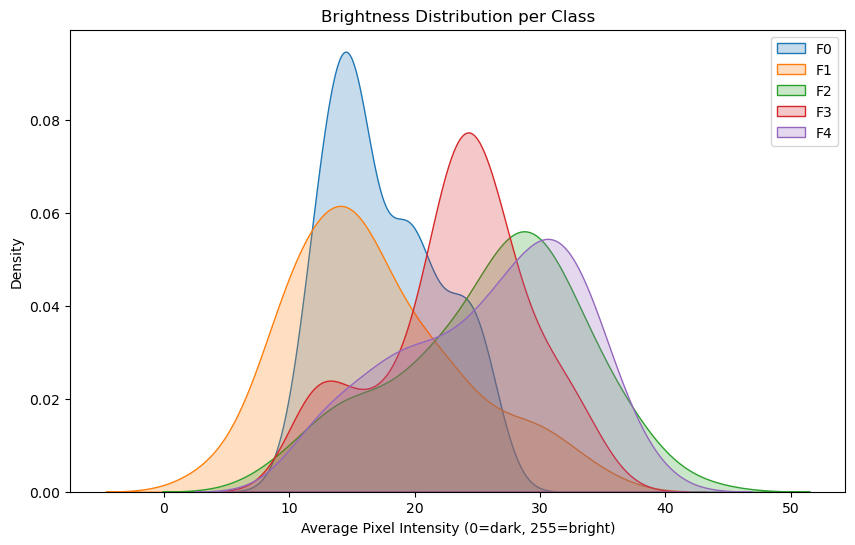

In [8]:
brightness = {}

for cls in os.listdir(balanced_path):
    class_dir = os.path.join(balanced_path, cls)
    values = []
    
    for img_name in os.listdir(class_dir)[:100]:  # limit for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            values.append(img.mean())
    brightness[cls] = values

plt.figure(figsize=(10, 6))
for cls, values in brightness.items():
    sns.kdeplot(values, label=cls, fill=True)
plt.title("Brightness Distribution per Class")
plt.xlabel("Average Pixel Intensity (0=dark, 255=bright)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [9]:
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)

In [10]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),      # or RandomResizedCrop(224) for training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])



In [11]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
#     return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
#                      padding=dilation, bias=False, groups=groups, dilation=dilation)

# def conv1x1(in_planes, out_planes, stride=1):
#     return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

# class ChannelAttention(nn.Module):
#     """Channel Attention Module"""
#     def __init__(self, in_planes, ratio=16):
#         super(ChannelAttention, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.max_pool = nn.AdaptiveMaxPool2d(1)
        
#         self.fc1 = nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
#         self.sigmoid = nn.Sigmoid()
    
#     def forward(self, x):
#         avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))
#         max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
#         out = avg_out + max_out
#         return self.sigmoid(out)

# class SpatialAttention(nn.Module):
#     """Spatial Attention Module"""
#     def __init__(self, kernel_size=7):
#         super(SpatialAttention, self).__init__()
#         assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
#         padding = 3 if kernel_size == 7 else 1
        
#         self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
#         self.sigmoid = nn.Sigmoid()
    
#     def forward(self, x):
#         avg_out = torch.mean(x, dim=1, keepdim=True)
#         max_out, _ = torch.max(x, dim=1, keepdim=True)
#         x = torch.cat([avg_out, max_out], dim=1)
#         x = self.conv1(x)
#         return self.sigmoid(x)

# class CBAM(nn.Module):
#     """Convolutional Block Attention Module"""
#     def __init__(self, in_planes, ratio=16, kernel_size=7):
#         super(CBAM, self).__init__()
#         self.ca = ChannelAttention(in_planes, ratio)
#         self.sa = SpatialAttention(kernel_size)
    
#     def forward(self, x):
#         x = x * self.ca(x)
#         x = x * self.sa(x)
#         return x

# class Bottleneck(nn.Module):
#     expansion = 4
#     def __init__(self, inplanes, planes, stride=1, downsample=None,
#                  groups=1, base_width=64, dilation=1, norm_layer=None,
#                  use_cbam=True, cbam_ratio=16):
#         super().__init__()
#         if norm_layer is None:
#             norm_layer = nn.BatchNorm2d
#         width = int(planes * (base_width / 64.0)) * groups

#         self.conv1 = conv1x1(inplanes, width)
#         self.bn1   = norm_layer(width)
#         self.conv2 = conv3x3(width, width, stride, groups, dilation)
#         self.bn2   = norm_layer(width)
#         self.conv3 = conv1x1(width, planes * self.expansion)
#         self.bn3   = norm_layer(planes * self.expansion)
#         self.relu  = nn.ReLU(inplace=True)
#         self.downsample = downsample
#         self.stride = stride
        
#         # Add CBAM module
#         self.use_cbam = use_cbam
#         if use_cbam:
#             self.cbam = CBAM(planes * self.expansion, ratio=cbam_ratio)

#     def forward(self, x):
#         identity = x

#         out = self.relu(self.bn1(self.conv1(x)))
#         out = self.relu(self.bn2(self.conv2(out)))
#         out = self.bn3(self.conv3(out))
        
#         # Apply CBAM attention
#         if self.use_cbam:
#             out = self.cbam(out)

#         if self.downsample is not None:
#             identity = self.downsample(x)

#         out += identity
#         out = self.relu(out)
#         return out

# class ResNet(nn.Module):
#     def __init__(self, block, layers, num_classes=1000,
#                  zero_init_residual=True, groups=1, width_per_group=64,
#                  replace_stride_with_dilation=None, norm_layer=None,
#                  use_cbam=True, cbam_ratio=16):
#         super().__init__()
#         if norm_layer is None:
#             norm_layer = nn.BatchNorm2d
#         if replace_stride_with_dilation is None:
#             replace_stride_with_dilation = [False, False, False]
#         assert len(replace_stride_with_dilation) == 3

#         self._norm_layer = norm_layer
#         self.inplanes = 64
#         self.dilation = 1
#         self.groups = groups
#         self.base_width = width_per_group
#         self.use_cbam = use_cbam
#         self.cbam_ratio = cbam_ratio

#         self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
#         self.bn1   = norm_layer(self.inplanes)
#         self.relu  = nn.ReLU(inplace=True)
#         self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

#         self.layer1 = self._make_layer(block,  64, layers[0])
#         self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
#                                        dilate=replace_stride_with_dilation[0])
#         self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
#                                        dilate=replace_stride_with_dilation[1])
#         self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
#                                        dilate=replace_stride_with_dilation[2])

#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(512 * block.expansion, num_classes)

#         # Kaiming init like torchvision
#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
#             elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
#                 nn.init.constant_(m.weight, 1)
#                 nn.init.constant_(m.bias, 0)

#         # Zero-init residual last BN to start each block as identity
#         if zero_init_residual:
#             for m in self.modules():
#                 if isinstance(m, Bottleneck):
#                     nn.init.constant_(m.bn3.weight, 0)

#     def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
#         norm_layer = self._norm_layer
#         downsample = None
#         previous_dilation = self.dilation
#         if dilate:
#             self.dilation *= stride
#             stride = 1

#         if stride != 1 or self.inplanes != planes * block.expansion:
#             downsample = nn.Sequential(
#                 conv1x1(self.inplanes, planes * block.expansion, stride),
#                 norm_layer(planes * block.expansion),
#             )

#         layers = []
#         layers.append(block(self.inplanes, planes, stride, downsample,
#                             groups=self.groups, base_width=self.base_width,
#                             dilation=previous_dilation, norm_layer=norm_layer,
#                             use_cbam=self.use_cbam, cbam_ratio=self.cbam_ratio))
#         self.inplanes = planes * block.expansion
#         for _ in range(1, blocks):
#             layers.append(block(self.inplanes, planes,
#                                 groups=self.groups, base_width=self.base_width,
#                                 dilation=self.dilation, norm_layer=norm_layer,
#                                 use_cbam=self.use_cbam, cbam_ratio=self.cbam_ratio))
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         x = self.relu(self.bn1(self.conv1(x)))
#         x = self.maxpool(x)

#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.layer4(x)

#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
#         return x

# def resnet50_cbam(num_classes=1000, use_cbam=True, cbam_ratio=16):
#     """
#     ResNet-50 with CBAM attention modules
    
#     Args:
#         num_classes (int): Number of output classes
#         use_cbam (bool): Whether to use CBAM modules (default: True)
#         cbam_ratio (int): Reduction ratio for channel attention (default: 16)
    
#     Returns:
#         ResNet model with CBAM
#     """
#     return ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes, 
#                   zero_init_residual=True, use_cbam=use_cbam, cbam_ratio=cbam_ratio)





In [12]:
import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights

# ---- Define CBAM block (if not already defined earlier) ----
class CBAM(nn.Module):
    def __init__(self, channels, reduction=16):
        super(CBAM, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        
        self.fc = nn.Sequential(
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1, bias=False)
        )
        
        self.sigmoid_channel = nn.Sigmoid()
        self.spatial = nn.Sequential(
            nn.Conv2d(2, 1, 7, padding=3, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Channel attention
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = self.sigmoid_channel(avg_out + max_out)
        x = x * out

        # Spatial attention
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.spatial(out)
        x = x * out
        return x

# ---- Wrap ResNet50 with CBAM ----
class ResNet50_CBAM(nn.Module):
    def __init__(self, num_classes=5, cbam_ratio=8):
        super(ResNet50_CBAM, self).__init__()
        # Load pretrained ResNet50 backbone
        self.backbone = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        # Insert CBAM into each residual layer
        self.backbone.layer1.add_module("cbam", CBAM(256, reduction=cbam_ratio))
        self.backbone.layer2.add_module("cbam", CBAM(512, reduction=cbam_ratio))
        self.backbone.layer3.add_module("cbam", CBAM(1024, reduction=cbam_ratio))
        self.backbone.layer4.add_module("cbam", CBAM(2048, reduction=cbam_ratio))

        # Replace final classifier with Dropout + Linear
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# ---- Instantiate model ----

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


num_classes = len(full_dataset.classes)
model = ResNet50_CBAM(num_classes=num_classes, cbam_ratio=8)
model = model.to(device)


In [19]:
import torch.optim as optim
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# ---- Loss function with class weights + label smoothing ----
class_weights = compute_class_weight("balanced", classes=np.unique(targets), y=targets)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

# ---- Optimizer & Scheduler ----
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", patience=3, factor=0.5)

# ---- Early Stopping ----
class EarlyStopping:
    def __init__(self, patience=7, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_acc):
        score = val_acc
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

# ---- Training Loop ----
num_epochs = 50  # more epochs
early_stopper = EarlyStopping(patience=7)

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(full_dataset)), targets)):
    print(f"\n===== Fold {fold+1} / {kfold.n_splits} =====")
    
    # Subset for train & validation
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)

    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=4)

    # Reset model for each fold
    model = ResNet50_CBAM(num_classes=num_classes, cbam_ratio=8).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", patience=3, factor=0.5)

    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")

        # ---- Train ----
        model.train()
        train_loss, correct, total = 0.0, 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * imgs.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        train_loss = train_loss / total

        # ---- Validate ----
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * imgs.size(0)
                _, preds = outputs.max(1)
                correct += preds.eq(labels).sum().item()
                total += labels.size(0)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_acc = correct / total
        val_loss = val_loss / total

        # Step scheduler
        scheduler.step(val_acc)

        # Print + log metrics
        from sklearn.metrics import classification_report, confusion_matrix
        cm = confusion_matrix(all_labels, all_preds)
        report = classification_report(all_labels, all_preds, target_names=full_dataset.classes, digits=4)

        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report)

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), f"checkpoints/fold_{fold+1}_best.pth")

        # Early stopping
        early_stopper(val_acc)
        if early_stopper.early_stop:
            print("Early stopping triggered.")
            break

    print(f"Best Val Acc for Fold {fold+1}: {best_acc:.4f}")



===== Fold 1 / 5 =====

Epoch 1/50
Train Loss: 1.0281 | Train Acc: 0.7297 | Val Loss: 1.0194 | Val Acc: 0.7723
Confusion Matrix:
 [[423   0   0   0   0]
 [  3  87  75   1   6]
 [  0   0 157   2   0]
 [  0   0 126  42   3]
 [ 12  10  50   0 268]]
Classification Report:
               precision    recall  f1-score   support

          F0     0.9658    1.0000    0.9826       423
          F1     0.8969    0.5058    0.6468       172
          F2     0.3848    0.9874    0.5538       159
          F3     0.9333    0.2456    0.3889       171
          F4     0.9675    0.7882    0.8687       340

    accuracy                         0.7723      1265
   macro avg     0.8297    0.7054    0.6882      1265
weighted avg     0.8795    0.7723    0.7722      1265


Epoch 2/50
Train Loss: 0.6429 | Train Acc: 0.9306 | Val Loss: 0.6302 | Val Acc: 0.9573
Confusion Matrix:
 [[423   0   0   0   0]
 [  0 169   3   0   0]
 [  0   7 136   8   8]
 [  0   7  10 151   3]
 [  2   3   0   3 332]]
Classification Re

C:\Users\muham\AppData\Local\Temp\ipykernel_24808\1917583292.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("checkpoints/fold_1_best.pth", map_locati

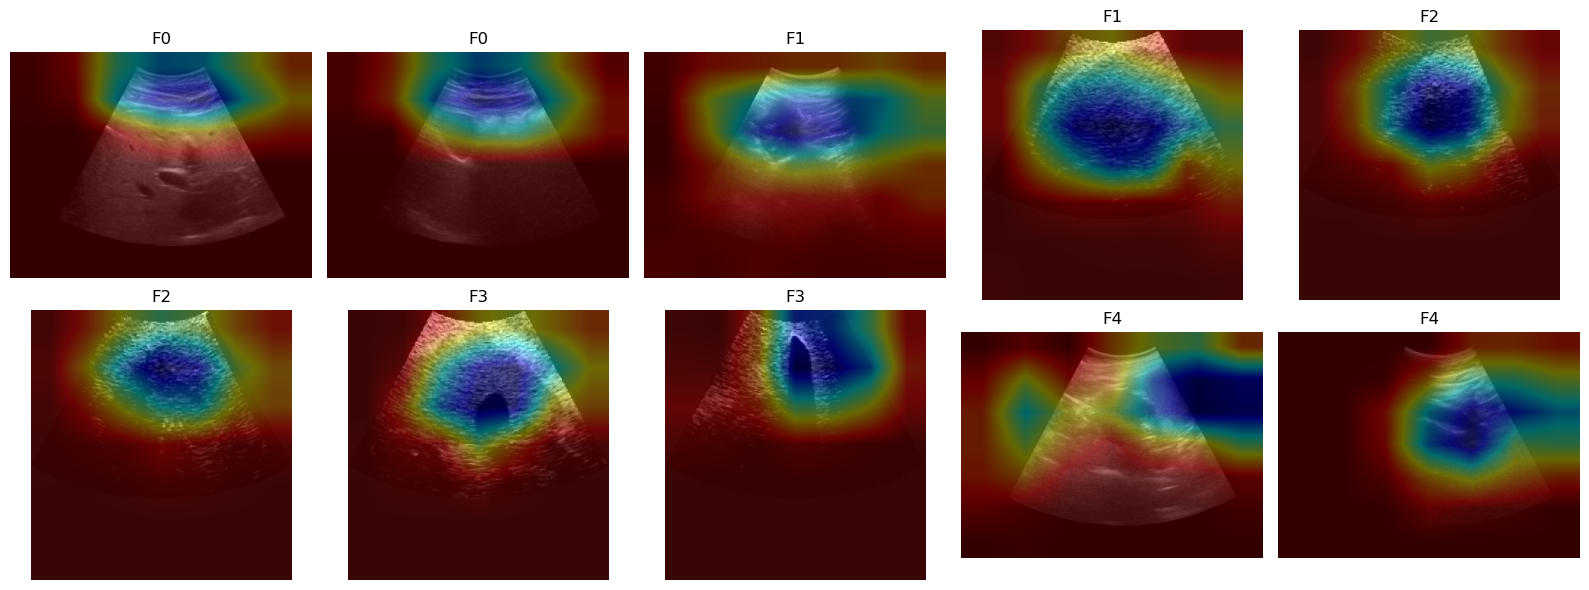

In [20]:
# ============================
# Grad-CAM for ResNet-50 + CBAM
# ============================
import os, random
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# ----------------------------
# Grad-CAM class (full backward hook)
# ----------------------------
class GradCAM:
    def __init__(self, model, target_layer, device):
        self.model = model
        self.model.eval()
        self.device = device
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, inp, out):
            self.activations = out.detach()

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        if hasattr(self.target_layer, "register_full_backward_hook"):
            self.target_layer.register_full_backward_hook(backward_hook)
        else:
            self.target_layer.register_backward_hook(backward_hook)  # fallback for older PyTorch

    def generate(self, input_tensor, class_idx=None):
        input_tensor = input_tensor.to(self.device)

        # clear stale grads, forward, pick class
        self.model.zero_grad(set_to_none=True)
        output = self.model(input_tensor)  # [1, num_classes]
        if class_idx is None:
            class_idx = int(output.argmax(dim=1).item())

        # backward on the chosen logit
        class_score = output[0, class_idx]
        class_score.backward()

        # Grad-CAM
        weights = self.gradients.mean(dim=(2, 3), keepdim=True)  # [1, C, 1, 1]
        gradcam = (weights * self.activations).sum(dim=1, keepdim=True)  # [1,1,H,W]
        gradcam = F.relu(gradcam)
        gradcam = F.interpolate(gradcam, size=input_tensor.shape[2:], mode="bilinear", align_corners=False)

        heatmap = gradcam.squeeze().cpu().numpy()
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
        return heatmap

# ----------------------------
# Overlay heatmap on image
# ----------------------------
def show_gradcam_on_image(img_path, heatmap, title=""):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)
    plt.imshow(superimposed)
    plt.title(title)
    plt.axis("off")

# ----------------------------
# Load your trained model
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 5  # must match training

# Use our updated ResNet50_CBAM class from training cells
model = ResNet50_CBAM(num_classes=num_classes, cbam_ratio=8)

# Robust checkpoint loading
ckpt = torch.load("checkpoints/fold_1_best.pth", map_location=device)
if isinstance(ckpt, dict) and any(k in ckpt for k in ["state_dict", "model_state_dict"]):
    state = ckpt.get("state_dict", ckpt.get("model_state_dict"))
else:
    state = ckpt
missing, unexpected = model.load_state_dict(state, strict=False)
if missing or unexpected:
    print("[Grad-CAM] Warning: state_dict mismatch.",
          "\n  Missing keys:", missing, "\n  Unexpected keys:", unexpected)

model.to(device).eval()

# ----------------------------
# Target layer for Grad-CAM
# ----------------------------
# Last block of layer4 usually works best
target_layer = model.backbone.layer4[-1]
gradcam = GradCAM(model, target_layer, device)

# ----------------------------
# Preprocessing (ImageNet-style)
# ----------------------------
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ----------------------------
# Sample images from dataset
# ----------------------------
root_dir = r"E:\resnet50+cbam\Dataset"  # single folder with class subfolders

def list_class_dirs(root):
    return [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]

def list_images(dir_path):
    exts = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}
    return [f for f in os.listdir(dir_path) if os.path.splitext(f)[1].lower() in exts]

random.seed(42)
classes = list_class_dirs(root_dir)
samples_per_class = 2
all_samples = []
for cls in classes:
    cls_dir = os.path.join(root_dir, cls)
    imgs = list_images(cls_dir)
    if not imgs:
        continue
    pick = random.sample(imgs, k=min(samples_per_class, len(imgs)))
    for fname in pick:
        all_samples.append((os.path.join(cls_dir, fname), cls))

# ----------------------------
# Run Grad-CAM and show results
# ----------------------------
cols = 5
rows = max(1, (len(all_samples) + cols - 1) // cols)
plt.figure(figsize=(3.2*cols, 3.0*rows))

for idx, (img_path, cls) in enumerate(all_samples, 1):
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)  # [1,3,224,224]

    heatmap = gradcam.generate(input_tensor)

    plt.subplot(rows, cols, idx)
    show_gradcam_on_image(img_path, heatmap, title=f"{cls}")

plt.tight_layout()
plt.show()



Epoch 2/50
Train Loss: 0.6429 | Train Acc: 93.06% | Val Loss: 0.6302 | Val Acc: 95.73%

Confusion Matrix:
[[423, 0, 0, 0, 0], [0, 169, 3, 0, 0], [0, 7, 136, 8, 8], [0, 7, 10, 151, 3], [2, 3, 0, 3, 332]]

Classification Report:
    Precision  Recall  F1-score
F0     0.9953  1.0000    0.9976
F1     0.9086  0.9826    0.9441
F2     0.9128  0.8553    0.8831
F3     0.9321  0.8830    0.9069
F4     0.9679  0.9765    0.9722


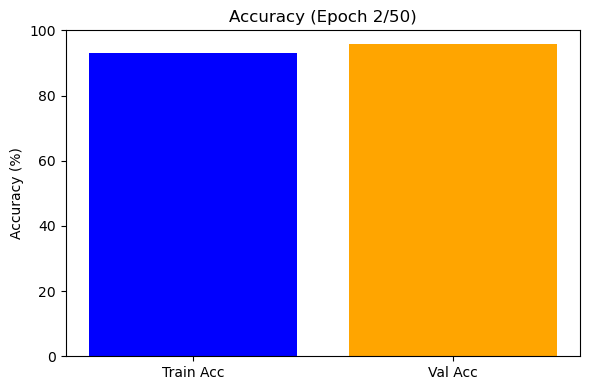

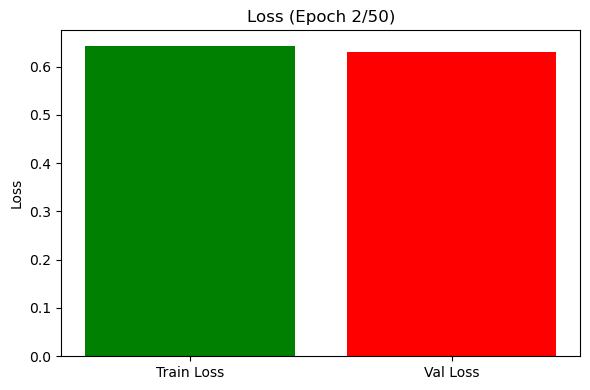

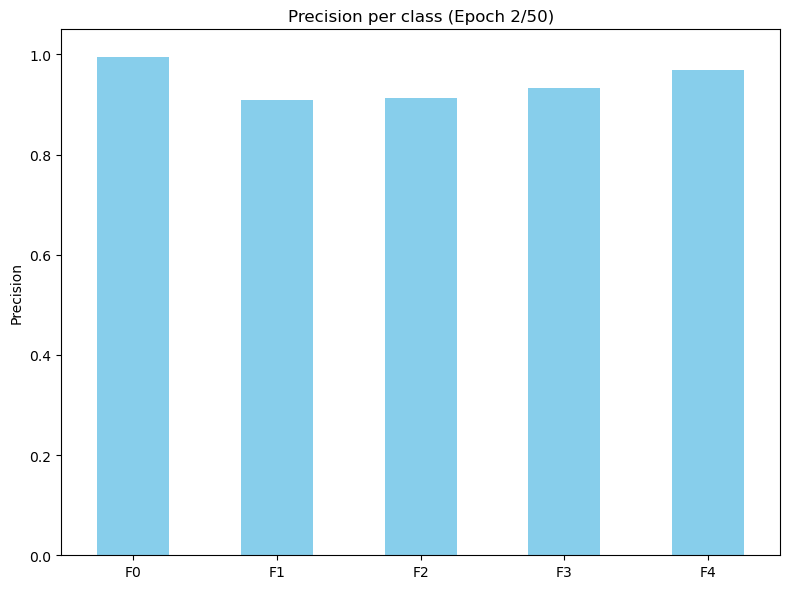

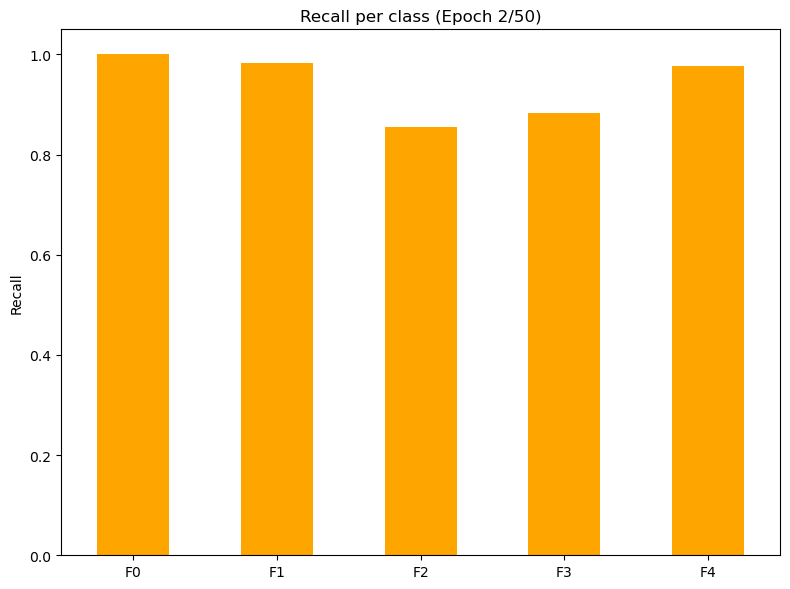

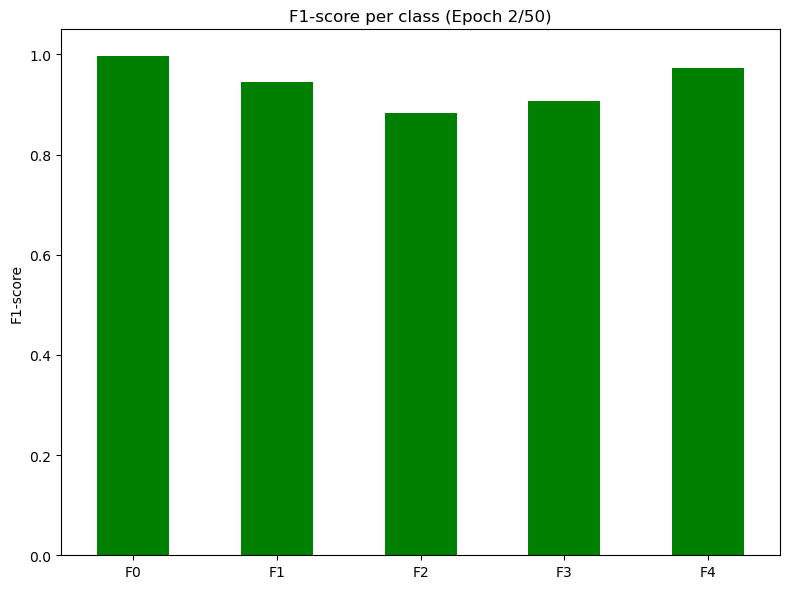

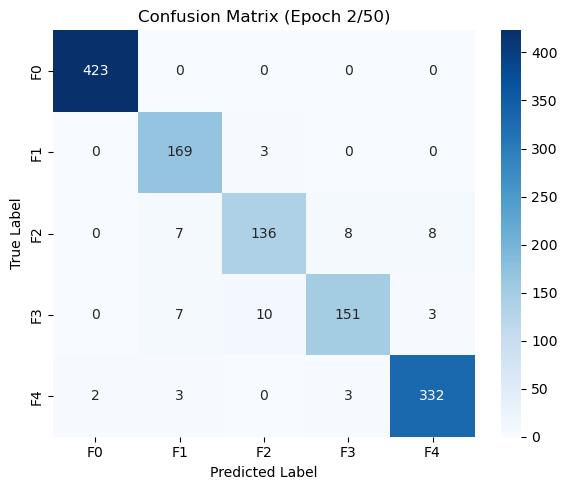

In [21]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------
# Config
# ------------------------
LOG_FILE = "training-resnet50+cbam-no-aug-kfold.log"
TARGET_EPOCH = 2   # choose which epoch to plot

# ------------------------
# Step 1: Read log file
# ------------------------
with open(LOG_FILE, "r", encoding="utf-8") as f:
    log_text = f.read()

# ------------------------
# Step 2: Extract all epoch blocks
# ------------------------
epoch_blocks = re.split(r"(Epoch\s+\d+/\d+)", log_text)
blocks = []
for i in range(1, len(epoch_blocks), 2):
    header = epoch_blocks[i].strip()   # e.g. "Epoch 2/50"
    body = epoch_blocks[i+1]
    blocks.append((header, body))

if not blocks:
    raise ValueError("No epoch blocks found in the log.")

# Pick the block for TARGET_EPOCH
chosen_block = None
for header, body in blocks:
    m = re.match(r"Epoch\s+(\d+)\s*/\s*(\d+)", header)
    if m and int(m.group(1)) == TARGET_EPOCH:
        chosen_block = (header, body)
        break

if not chosen_block:
    raise ValueError(f"Epoch {TARGET_EPOCH} not found in log.")

header, epoch_block = chosen_block
epoch_num, total_epochs = re.match(r"Epoch\s+(\d+)\s*/\s*(\d+)", header).groups()

# ------------------------
# Step 3: Parse metrics
# ------------------------
m = re.search(
    r"Train\s+Loss:\s*([0-9.]+)\s*\|\s*Train\s+Acc:\s*([0-9.]+)\s*\|\s*Val\s+Loss:\s*([0-9.]+)\s*\|\s*Val\s+Acc:\s*([0-9.]+)",
    epoch_block
)
if not m:
    raise ValueError("Could not find Train/Val metrics line in the chosen epoch block.")
train_loss = float(m.group(1))
train_acc = float(m.group(2)) * 100.0
val_loss   = float(m.group(3))
val_acc    = float(m.group(4)) * 100.0

# ------------------------
# Step 4: Parse Confusion Matrix
# ------------------------
cm_match = re.search(r"Confusion\s+Matrix:\s*\n(.*?)\nClassification\s+Report:", epoch_block, re.S)
if not cm_match:
    raise ValueError("Could not extract confusion matrix.")
cm_text = cm_match.group(1).strip()
rows = [line for line in cm_text.splitlines() if "[" in line and "]" in line]
confusion_matrix = []
for line in rows:
    nums = re.findall(r"-?\d+", line)
    confusion_matrix.append([int(x) for x in nums])

# ------------------------
# Step 5: Parse Classification Report
# ------------------------
cr_match = re.search(r"Classification\s+Report:\s*\n(.*)", epoch_block, re.S)
if not cr_match:
    raise ValueError("Could not extract classification report.")
report_block = cr_match.group(1).strip()

lines = [ln.strip() for ln in report_block.splitlines() if ln.strip()]
classes, prec, rec, f1 = [], [], [], []
for ln in lines:
    if ln.startswith(("precision", "recall", "f1-score", "support")):
        continue
    if ln.startswith(("accuracy", "macro avg", "weighted avg")):
        continue
    parts = ln.split()
    if len(parts) >= 5:
        label = parts[0]
        try:
            p = float(parts[1]); r = float(parts[2]); f1s = float(parts[3])
        except ValueError:
            continue
        classes.append(label)
        prec.append(p)
        rec.append(r)
        f1.append(f1s)

df_report = pd.DataFrame(
    {"Precision": prec, "Recall": rec, "F1-score": f1},
    index=classes
)

# ------------------------
# Step 6: Print epoch summary
# ------------------------
print(f"\n{'='*30}\n{header}\n{'='*30}")
print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
      f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix)
print("\nClassification Report:")
print(df_report)

# ------------------------
# Step 7: Plots
# ------------------------
plt.figure(figsize=(6,4))
plt.bar(["Train Acc", "Val Acc"], [train_acc, val_acc], color=["blue", "orange"])
plt.ylabel("Accuracy (%)")
plt.title(f"Accuracy ({header})")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Train Loss", "Val Loss"], [train_loss, val_loss], color=["green", "red"])
plt.ylabel("Loss")
plt.title(f"Loss ({header})")
plt.tight_layout()
plt.show()

df_report["Precision"].plot(kind="bar", figsize=(8,6), color="skyblue")
plt.title(f"Precision per class ({header})")
plt.ylim(0.0, 1.05)
plt.xticks(rotation=0)
plt.ylabel("Precision")
plt.tight_layout()
plt.show()

df_report["Recall"].plot(kind="bar", figsize=(8,6), color="orange")
plt.title(f"Recall per class ({header})")
plt.ylim(0.0, 1.05)
plt.xticks(rotation=0)
plt.ylabel("Recall")
plt.tight_layout()
plt.show()

df_report["F1-score"].plot(kind="bar", figsize=(8,6), color="green")
plt.title(f"F1-score per class ({header})")
plt.ylim(0.0, 1.05)
plt.xticks(rotation=0)
plt.ylabel("F1-score")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title(f"Confusion Matrix ({header})")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


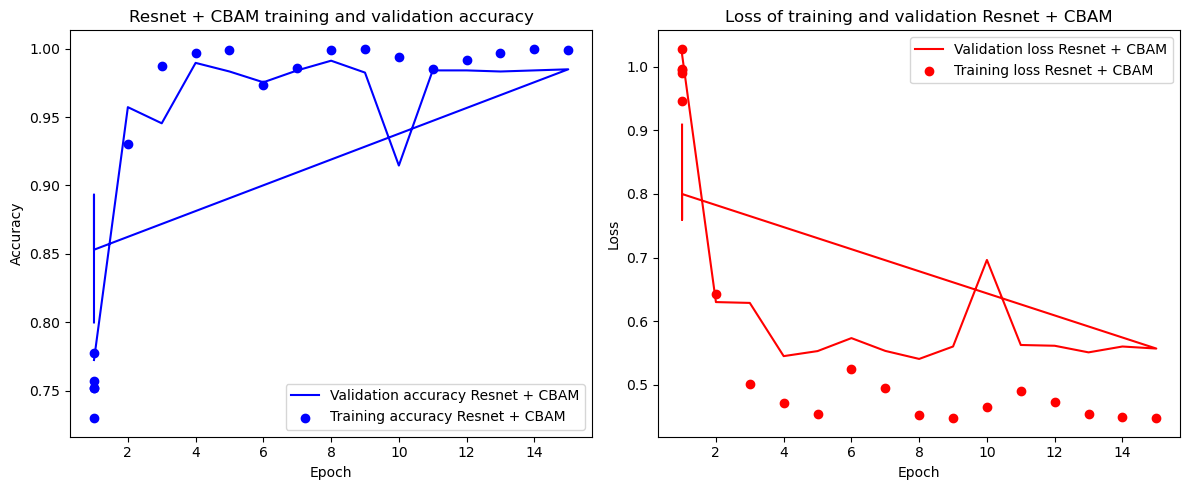

In [22]:
import re
import matplotlib.pyplot as plt

LOG_FILE = "training-resnet50+cbam-no-aug-kfold.log"

# Read log
with open(LOG_FILE, "r", encoding="utf-8") as f:
    log_text = f.read()

# Extract metrics from all epochs
pattern = re.compile(
    r"Epoch\s+(\d+)/(\d+).*?"
    r"Train\s+Loss:\s*([0-9.]+)\s*\|\s*Train\s+Acc:\s*([0-9.]+)\s*\|\s*Val\s+Loss:\s*([0-9.]+)\s*\|\s*Val\s+Acc:\s*([0-9.]+)",
    re.S
)

epochs, train_acc, val_acc, train_loss, val_loss = [], [], [], [], []

for match in pattern.finditer(log_text):
    epoch = int(match.group(1))
    total_epochs = int(match.group(2))
    tl, ta, vl, va = map(float, match.group(3,4,5,6))
    epochs.append(epoch)
    train_loss.append(tl)
    train_acc.append(ta)
    val_loss.append(vl)
    val_acc.append(va)

# Plot accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, val_acc, label="Validation accuracy Resnet + CBAM", color="blue")
plt.scatter(epochs, train_acc, label="Training accuracy Resnet + CBAM", color="blue", marker="o")
plt.title("Resnet + CBAM training and validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(epochs, val_loss, label="Validation loss Resnet + CBAM", color="red")
plt.scatter(epochs, train_loss, label="Training loss Resnet + CBAM", color="red", marker="o")
plt.title("Loss of training and validation Resnet + CBAM")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
